
# Example of the `aitlas` toolbox for benchmarking a dataset

This notebook shows a sample implementation of a multi class image classification using the `aitlas` toolbox using the UC Merced dataset.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

from aitlas.datasets import UcMercedDataset
from aitlas.models import VGG16
from aitlas.tasks import StratifiedSplitTask

## Define the splits and dataset paths

In [19]:
splits = [(10, 90), (20, 80), (30, 70), (40, 60), (50, 50), (60, 40), (70, 30), 
          (80, 20), (90, 10)] # one tuple is (train, test)
data_dir = "/media/hdd/multi-class/UCMerced" # where is the dataset on disk

## Loop through the splits, train and evaluate

In [20]:
results = [] # results accumulator

# iterate through the splits
for train, test in splits:
    # where to store the file names of the train images
    train_csv_file = f"/media/hdd/multi-class/UCMerced/train_{train}_{test}.csv"
    # where to store the file names of the test images
    test_csv_file = f"/media/hdd/multi-class/UCMerced/test_{train}_{test}.csv"
    # configure split task
    split_config = {
        "split": {
            "train": {
                "ratio": train,
                "file": train_csv_file
            },
            "test": {
                "ratio": test,
                "file": test_csv_file
            }
        },
        "data_dir": data_dir
    }
    split_task = StratifiedSplitTask(None, split_config)
    split_task.run()
    
    # setup train set
    train_dataset_config = {
        "batch_size": 4,
        "shuffle": True,
        "num_workers": 4,
        "csv_file": train_csv_file,
        "data_dir": data_dir,  
        "transforms": ["aitlas.transforms.ResizeCenterCropFlipHVToTensor"]
    }

    train_dataset = UcMercedDataset(train_dataset_config)
    
    # setup test set
    test_dataset_config = {
        "batch_size": 4,
        "shuffle": False,
        "num_workers": 4,
        "csv_file": test_csv_file,
        "data_dir": data_dir,
        "transforms": ["aitlas.transforms.ResizeCenterCropToTensor"]
    }

    test_dataset = UcMercedDataset(test_dataset_config)
    print(f"Train size: {len(train_dataset)}, Test size: {len(test_dataset)}")
    
    
    # setup model
    epochs = 50
    model_directory = "./experiments/uc_merced/"
    model_config = {
        "num_classes": 21, 
        "learning_rate": 0.0001,
        "pretrained": True
    }
    model = VGG16(model_config)
    model.prepare()

    # training and evaluation
    model.train_and_evaluate_model(
        train_dataset=train_dataset,
        epochs=epochs,
        model_directory=model_directory,
        val_dataset=test_dataset,
        run_id='1',
    )
    
    # collect results
    results.append(model.running_metrics.f1_score())

2021-12-02 19:46:12,147 INFO Loading data...
2021-12-02 19:46:12,157 INFO Making splits...
2021-12-02 19:46:12,162 INFO And that's it!


Train size: 210, Test size: 1890


2021-12-02 19:46:12,992 INFO Starting training.
training: 100%|█████████████████████████████████| 53/53 [00:04<00:00, 12.18it/s]
2021-12-02 19:46:17,442 INFO epoch: 1, time: 4, loss:  2.81071
testing on train set: 100%|█████████████████████| 53/53 [00:01<00:00, 43.64it/s]
2021-12-02 19:46:24,521 INFO F1_score Micro:0.3619047619047619, F1_score Macro:0.2929999056305674, F1_score Weighted:0.29299990563056727, F1_score per Class:[0.95238095 0.         0.         0.51428571 0.         1.
 0.         0.48780488 0.625      0.33333333 0.14285714 0.33333333
 0.         0.20512821 0.18181818 0.35714286 0.         0.57142857
 0.         0.26666667 0.18181818]
testing on validation set: 100%|██████████████| 473/473 [00:09<00:00, 50.77it/s]
2021-12-02 19:46:33,842 INFO F1_score Micro:0.3164021164021164, F1_score Macro:0.23631244655543815, F1_score Weighted:0.23631244655543815, F1_score per Class:[0.82828283 0.         0.1        0.46975089 0.         0.94382022
 0.         0.42891566 0.23357664 0.

testing on validation set: 100%|██████████████| 473/473 [00:09<00:00, 50.41it/s]
2021-12-02 19:50:22,498 INFO F1_score Micro:0.7656084656084656, F1_score Macro:0.7655821196180397, F1_score Weighted:0.7655821196180396, F1_score per Class:[0.93023256 0.84507042 0.86338798 0.91005291 0.45801527 0.94117647
 0.42857143 0.82790698 0.75       0.77777778 0.98876404 0.6013986
 0.47447447 0.46540881 0.70731707 0.96666667 0.70422535 0.9273743
 0.77319588 0.79503106 0.94117647]
training: 100%|█████████████████████████████████| 53/53 [00:04<00:00, 12.20it/s]
2021-12-02 19:50:26,846 INFO epoch: 17, time: 4, loss:  0.19402
testing on train set: 100%|█████████████████████| 53/53 [00:01<00:00, 45.25it/s]
2021-12-02 19:50:28,021 INFO F1_score Micro:0.9666666666666667, F1_score Macro:0.9678402355094078, F1_score Weighted:0.9678402355094077, F1_score per Class:[1.         1.         1.         0.88888889 1.         1.
 0.94736842 0.8        1.         0.88888889 1.         1.
 0.95238095 0.95238095 1.    

training: 100%|█████████████████████████████████| 53/53 [00:04<00:00, 12.19it/s]
2021-12-02 19:54:21,886 INFO epoch: 32, time: 4, loss:  0.28567
testing on train set: 100%|█████████████████████| 53/53 [00:01<00:00, 45.05it/s]
2021-12-02 19:54:23,066 INFO F1_score Micro:0.9571428571428572, F1_score Macro:0.9555607995457616, F1_score Weighted:0.9555607995457611, F1_score per Class:[1.         1.         1.         0.95238095 1.         1.
 1.         0.95238095 0.90909091 1.         1.         0.94736842
 0.88888889 1.         0.75       1.         1.         0.66666667
 1.         1.         1.        ]
testing on validation set: 100%|██████████████| 473/473 [00:09<00:00, 50.50it/s]
2021-12-02 19:54:32,437 INFO F1_score Micro:0.7042328042328042, F1_score Macro:0.6942085027694719, F1_score Weighted:0.694208502769472, F1_score per Class:[0.80788177 0.85227273 0.78453039 0.81675393 0.4893617  0.94915254
 0.40883978 0.83568075 0.59360731 0.72432432 0.97777778 0.57575758
 0.49253731 0.425196

testing on validation set: 100%|██████████████| 473/473 [00:09<00:00, 50.50it/s]
2021-12-02 19:56:31,494 INFO F1_score Micro:0.7904761904761904, F1_score Macro:0.7893663213277049, F1_score Weighted:0.7893663213277049, F1_score per Class:[0.9005848  0.92473118 0.88770053 0.83673469 0.64444444 0.93333333
 0.48275862 0.84761905 0.77837838 0.74418605 0.97175141 0.79245283
 0.48051948 0.51908397 0.77894737 0.97802198 0.67586207 0.83060109
 0.81818182 0.78947368 0.96132597]
training: 100%|█████████████████████████████████| 53/53 [00:04<00:00, 12.17it/s]
2021-12-02 19:56:35,852 INFO epoch: 41, time: 4, loss:  0.00149
testing on train set: 100%|█████████████████████| 53/53 [00:01<00:00, 43.90it/s]
2021-12-02 19:56:42,899 INFO F1_score Micro:1.0, F1_score Macro:0.9999999999999994, F1_score Weighted:0.9999999999999991, F1_score per Class:[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
testing on validation set: 100%|██████████████| 473/473 [00:09<00:00, 50.62it/s]
2021-12-02 19:

training: 100%|█████████████████████████████████| 53/53 [00:04<00:00, 12.18it/s]
2021-12-02 19:58:40,755 INFO epoch: 49, time: 4, loss:  0.53768
testing on train set: 100%|█████████████████████| 53/53 [00:01<00:00, 45.09it/s]
2021-12-02 19:58:41,934 INFO F1_score Micro:0.9, F1_score Macro:0.8951751299430837, F1_score Weighted:0.8951751299430837, F1_score per Class:[1.         0.68965517 0.88888889 0.94736842 0.57142857 1.
 0.88888889 0.95238095 0.95238095 0.85714286 0.95238095 0.95238095
 0.83333333 1.         0.94736842 1.         0.95238095 1.
 0.95238095 0.88888889 0.57142857]
testing on validation set: 100%|██████████████| 473/473 [00:09<00:00, 50.68it/s]
2021-12-02 19:58:51,271 INFO F1_score Micro:0.6486772486772486, F1_score Macro:0.6298514680893129, F1_score Weighted:0.6298514680893129, F1_score per Class:[0.93567251 0.50581395 0.75342466 0.75167785 0.1372549  0.90217391
 0.1509434  0.85576923 0.60483871 0.67032967 0.89142857 0.58510638
 0.49392713 0.5027933  0.53179191 0.897959

Train size: 420, Test size: 1680


2021-12-02 19:59:12,870 INFO Starting training.
training: 100%|███████████████████████████████| 105/105 [00:08<00:00, 12.31it/s]
2021-12-02 19:59:21,497 INFO epoch: 1, time: 9, loss:  2.72589
testing on train set: 100%|███████████████████| 105/105 [00:02<00:00, 47.31it/s]
2021-12-02 19:59:29,597 INFO F1_score Micro:0.3476190476190476, F1_score Macro:0.3017523879664466, F1_score Weighted:0.3017523879664466, F1_score per Class:[0.82352941 0.         0.         0.37037037 0.28571429 0.18181818
 0.         0.54166667 0.60606061 0.33898305 0.44444444 0.
 0.37837838 0.17241379 0.6031746  0.88888889 0.         0.23076923
 0.         0.47058824 0.        ]
testing on validation set: 100%|██████████████| 420/420 [00:08<00:00, 50.32it/s]
2021-12-02 19:59:37,947 INFO F1_score Micro:0.30773809523809526, F1_score Macro:0.2520334895333713, F1_score Weighted:0.2520334895333713, F1_score per Class:[0.75968992 0.         0.         0.17204301 0.1509434  0.11627907
 0.         0.57425743 0.34328358 0.30

training: 100%|███████████████████████████████| 105/105 [00:08<00:00, 12.34it/s]
2021-12-02 20:01:40,774 INFO epoch: 8, time: 8, loss:  0.73567
testing on train set: 100%|███████████████████| 105/105 [00:02<00:00, 48.05it/s]
2021-12-02 20:01:42,963 INFO F1_score Micro:0.8142857142857143, F1_score Macro:0.792695159326815, F1_score Weighted:0.7926951593268152, F1_score per Class:[0.94736842 0.88888889 0.93023256 0.9047619  0.63492063 1.
 0.48484848 0.92682927 0.88372093 0.87804878 0.88888889 0.75555556
 0.         0.55172414 0.86363636 0.83333333 0.92307692 0.78787879
 0.84210526 0.85714286 0.86363636]
testing on validation set: 100%|██████████████| 420/420 [00:08<00:00, 50.39it/s]
2021-12-02 20:01:51,302 INFO F1_score Micro:0.7154761904761905, F1_score Macro:0.6928820365539666, F1_score Weighted:0.6928820365539665, F1_score per Class:[0.89655172 0.75897436 0.82608696 0.75376884 0.46025105 0.98765432
 0.35       0.96341463 0.78350515 0.79411765 0.80597015 0.64248705
 0.02469136 0.4571428

training: 100%|███████████████████████████████| 105/105 [00:08<00:00, 12.33it/s]
2021-12-02 20:03:59,970 INFO epoch: 15, time: 8, loss:  0.41983
testing on train set: 100%|███████████████████| 105/105 [00:02<00:00, 47.93it/s]
2021-12-02 20:04:02,165 INFO F1_score Micro:0.7857142857142857, F1_score Macro:0.7608376305717653, F1_score Weighted:0.7608376305717653, F1_score per Class:[0.94736842 0.26086957 0.82608696 1.         0.90909091 0.85106383
 0.32       0.9047619  0.97560976 0.90909091 0.97435897 0.83333333
 0.44736842 0.         0.92682927 0.85714286 0.94736842 0.93023256
 0.66666667 0.57142857 0.91891892]
testing on validation set: 100%|██████████████| 420/420 [00:08<00:00, 50.42it/s]
2021-12-02 20:04:10,500 INFO F1_score Micro:0.6601190476190476, F1_score Macro:0.6352541277062173, F1_score Weighted:0.6352541277062174, F1_score per Class:[0.92       0.21978022 0.8        0.92307692 0.53333333 0.82051282
 0.11111111 0.91860465 0.77894737 0.7654321  0.89655172 0.52892562
 0.38395415

training: 100%|███████████████████████████████| 105/105 [00:08<00:00, 12.33it/s]
2021-12-02 20:06:19,231 INFO epoch: 22, time: 9, loss:  0.36305
testing on train set: 100%|███████████████████| 105/105 [00:02<00:00, 48.19it/s]
2021-12-02 20:06:21,413 INFO F1_score Micro:0.969047619047619, F1_score Macro:0.969689713343272, F1_score Weighted:0.9696897133432716, F1_score per Class:[0.97435897 1.         1.         0.97560976 1.         1.
 0.97435897 1.         0.88888889 0.92682927 1.         1.
 1.         0.97560976 0.81632653 1.         1.         0.85714286
 0.97435897 1.         1.        ]
testing on validation set: 100%|██████████████| 420/420 [00:08<00:00, 50.48it/s]
2021-12-02 20:06:29,737 INFO F1_score Micro:0.818452380952381, F1_score Macro:0.8212740282706683, F1_score Weighted:0.8212740282706683, F1_score per Class:[0.86524823 0.91017964 0.89655172 0.81481481 0.6875     0.98765432
 0.44067797 0.97530864 0.734375   0.8125     0.96855346 0.81081081
 0.58436214 0.79710145 0.69868

training: 100%|███████████████████████████████| 105/105 [00:08<00:00, 12.34it/s]
2021-12-02 20:08:32,489 INFO epoch: 29, time: 9, loss:  0.50022
testing on train set: 100%|███████████████████| 105/105 [00:02<00:00, 47.88it/s]
2021-12-02 20:08:34,686 INFO F1_score Micro:0.8833333333333333, F1_score Macro:0.8792183814459784, F1_score Weighted:0.8792183814459784, F1_score per Class:[1.         0.94736842 0.97435897 0.90909091 0.92307692 1.
 0.89473684 1.         0.75       0.4        0.86956522 0.88888889
 0.88888889 0.97560976 0.80952381 1.         0.85714286 0.95
 0.8        0.6779661  0.94736842]
testing on validation set: 100%|██████████████| 420/420 [00:08<00:00, 50.38it/s]
2021-12-02 20:08:43,027 INFO F1_score Micro:0.7482142857142857, F1_score Macro:0.7440184268472687, F1_score Weighted:0.7440184268472687, F1_score per Class:[0.88888889 0.66666667 0.82857143 0.78888889 0.64473684 0.96385542
 0.5        0.95483871 0.77037037 0.31372549 0.81443299 0.67175573
 0.58441558 0.86075949 0.

training: 100%|███████████████████████████████| 105/105 [00:08<00:00, 12.34it/s]
2021-12-02 20:10:51,747 INFO epoch: 36, time: 8, loss:  0.44668
testing on train set: 100%|███████████████████| 105/105 [00:02<00:00, 48.09it/s]
2021-12-02 20:10:53,934 INFO F1_score Micro:0.9547619047619048, F1_score Macro:0.9539853313579523, F1_score Weighted:0.9539853313579518, F1_score per Class:[1.         0.95238095 1.         1.         1.         1.
 0.75555556 0.97435897 1.         0.97560976 0.97435897 0.94736842
 0.84444444 0.70967742 0.97560976 1.         1.         0.97435897
 0.97560976 0.97435897 1.        ]
testing on validation set: 100%|██████████████| 420/420 [00:08<00:00, 50.52it/s]
2021-12-02 20:11:02,253 INFO F1_score Micro:0.8059523809523811, F1_score Macro:0.8062860471485365, F1_score Weighted:0.8062860471485366, F1_score per Class:[0.91891892 0.8042328  0.94117647 0.91925466 0.67153285 0.94117647
 0.34123223 0.96815287 0.87581699 0.81333333 0.88275862 0.84415584
 0.61883408 0.29787

training: 100%|███████████████████████████████| 105/105 [00:08<00:00, 12.34it/s]
2021-12-02 20:13:10,975 INFO epoch: 43, time: 8, loss:  0.04566
testing on train set: 100%|███████████████████| 105/105 [00:02<00:00, 48.33it/s]
2021-12-02 20:13:13,151 INFO F1_score Micro:0.9976190476190476, F1_score Macro:0.997617558593168, F1_score Weighted:0.9976175585931676, F1_score per Class:[1.         1.         1.         1.         0.97560976 1.
 0.97435897 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.        ]
testing on validation set: 100%|██████████████| 420/420 [00:08<00:00, 50.30it/s]
2021-12-02 20:13:21,506 INFO F1_score Micro:0.8547619047619046, F1_score Macro:0.8562101035885267, F1_score Weighted:0.8562101035885267, F1_score per Class:[0.95424837 0.81767956 0.92       0.92405063 0.65989848 1.
 0.45255474 0.95238095 0.91823899 0.86486486 0.93167702 0.92105263
 0.67741935 0.83333333 0.87417219 0.99371069

training: 100%|███████████████████████████████| 105/105 [00:08<00:00, 12.31it/s]
2021-12-02 20:15:24,323 INFO epoch: 50, time: 9, loss:  0.58402
testing on train set: 100%|███████████████████| 105/105 [00:02<00:00, 48.12it/s]
2021-12-02 20:15:26,509 INFO F1_score Micro:0.8761904761904762, F1_score Macro:0.8810660487322467, F1_score Weighted:0.8810660487322465, F1_score per Class:[0.89473684 0.89473684 0.91891892 0.97560976 0.82352941 1.
 0.59701493 0.91891892 0.88888889 0.79166667 0.97560976 0.97435897
 0.53333333 0.94736842 0.97435897 1.         0.86486486 0.78787879
 0.90909091 0.97435897 0.85714286]
testing on validation set: 100%|██████████████| 420/420 [00:08<00:00, 50.51it/s]
2021-12-02 20:15:34,828 INFO F1_score Micro:0.7107142857142857, F1_score Macro:0.7107141430637494, F1_score Weighted:0.7107141430637492, F1_score per Class:[0.88888889 0.7804878  0.80291971 0.72906404 0.27083333 0.98089172
 0.41477273 0.78518519 0.75829384 0.71502591 0.90909091 0.65753425
 0.2962963  0.67741

Train size: 630, Test size: 1470


2021-12-02 20:15:41,538 INFO Starting training.
training: 100%|███████████████████████████████| 158/158 [00:12<00:00, 12.39it/s]
2021-12-02 20:15:54,392 INFO epoch: 1, time: 13, loss:  2.66601
testing on train set: 100%|███████████████████| 158/158 [00:03<00:00, 49.12it/s]
2021-12-02 20:16:03,465 INFO F1_score Micro:0.3396825396825397, F1_score Macro:0.25314236906182974, F1_score Weighted:0.25314236906182974, F1_score per Class:[0.88135593 0.06451613 0.24489796 0.38333333 0.         0.90322581
 0.26086957 0.57142857 0.54736842 0.         0.52173913 0.
 0.         0.         0.47058824 0.         0.         0.
 0.22857143 0.         0.23809524]
testing on validation set: 100%|██████████████| 368/368 [00:07<00:00, 50.25it/s]
2021-12-02 20:16:10,793 INFO F1_score Micro:0.34965986394557824, F1_score Macro:0.2579440956170663, F1_score Weighted:0.2579440956170663, F1_score per Class:[0.84768212 0.02777778 0.37179487 0.448      0.         0.93150685
 0.26415094 0.57261411 0.53588517 0.       

training: 100%|███████████████████████████████| 158/158 [00:12<00:00, 12.40it/s]
2021-12-02 20:18:43,304 INFO epoch: 8, time: 13, loss:  0.61158
testing on train set: 100%|███████████████████| 158/158 [00:03<00:00, 49.00it/s]
2021-12-02 20:18:46,533 INFO F1_score Micro:0.8825396825396825, F1_score Macro:0.8806452640858483, F1_score Weighted:0.8806452640858484, F1_score per Class:[0.98305085 0.88235294 0.87272727 0.86792453 0.6744186  1.
 0.3902439  0.95238095 0.96774194 0.81081081 0.88888889 0.98305085
 0.72727273 0.82352941 0.92857143 1.         0.90909091 0.96774194
 0.93333333 0.94736842 0.98305085]
testing on validation set: 100%|██████████████| 368/368 [00:07<00:00, 50.28it/s]
2021-12-02 20:18:53,856 INFO F1_score Micro:0.7850340136054422, F1_score Macro:0.7832590433799996, F1_score Weighted:0.7832590433799995, F1_score per Class:[0.94736842 0.80952381 0.78991597 0.65454545 0.53097345 1.
 0.23255814 0.93959732 0.84       0.62857143 0.8976378  0.75409836
 0.64556962 0.62264151 0.83

training: 100%|███████████████████████████████| 158/158 [00:12<00:00, 12.41it/s]
2021-12-02 20:21:32,188 INFO epoch: 15, time: 13, loss:  0.11910
testing on train set: 100%|███████████████████| 158/158 [00:03<00:00, 49.26it/s]
2021-12-02 20:21:35,399 INFO F1_score Micro:0.9523809523809523, F1_score Macro:0.9533832057996947, F1_score Weighted:0.9533832057996944, F1_score per Class:[0.98360656 1.         1.         0.89285714 0.96551724 1.
 0.80769231 1.         0.94736842 0.98305085 0.94736842 1.
 0.78378378 0.88888889 0.96774194 1.         0.86956522 1.
 0.98360656 1.         1.        ]
testing on validation set: 100%|██████████████| 368/368 [00:07<00:00, 50.30it/s]
2021-12-02 20:21:42,719 INFO F1_score Micro:0.8346938775510204, F1_score Macro:0.8339431191536888, F1_score Weighted:0.8339431191536888, F1_score per Class:[0.96402878 0.90076336 0.90789474 0.70175439 0.71014493 0.97902098
 0.45098039 0.96350365 0.87096774 0.84848485 0.90625    0.91970803
 0.64210526 0.74137931 0.8974359  

training: 100%|███████████████████████████████| 158/158 [00:12<00:00, 12.42it/s]
2021-12-02 20:24:21,146 INFO epoch: 22, time: 13, loss:  0.29404
testing on train set: 100%|███████████████████| 158/158 [00:03<00:00, 49.30it/s]
2021-12-02 20:24:24,355 INFO F1_score Micro:0.9682539682539683, F1_score Macro:0.9684129190962125, F1_score Weighted:0.9684129190962123, F1_score per Class:[0.98360656 1.         0.98360656 1.         0.92307692 1.
 0.96666667 1.         0.98305085 0.92857143 1.         0.96551724
 0.96666667 0.98305085 0.9375     1.         0.92857143 0.90909091
 0.98360656 0.96551724 0.92857143]
testing on validation set: 100%|██████████████| 368/368 [00:07<00:00, 50.29it/s]
2021-12-02 20:24:31,677 INFO F1_score Micro:0.8537414965986394, F1_score Macro:0.8536007311490288, F1_score Weighted:0.8536007311490286, F1_score per Class:[0.95652174 0.94117647 0.86330935 0.89361702 0.71186441 0.97222222
 0.67716535 0.97183099 0.75675676 0.85483871 0.99280576 0.74336283
 0.75342466 0.8360

training: 100%|███████████████████████████████| 158/158 [00:12<00:00, 12.41it/s]
2021-12-02 20:27:04,260 INFO epoch: 29, time: 13, loss:  0.18213
testing on train set: 100%|███████████████████| 158/158 [00:03<00:00, 49.11it/s]
2021-12-02 20:27:07,481 INFO F1_score Micro:0.9634920634920635, F1_score Macro:0.9613144180882527, F1_score Weighted:0.9613144180882525, F1_score per Class:[1.         1.         0.96774194 0.98305085 0.8        0.98305085
 0.96774194 0.98360656 1.         1.         1.         0.96774194
 0.94915254 1.         1.         1.         0.98305085 1.
 0.98305085 0.63636364 0.98305085]
testing on validation set: 100%|██████████████| 368/368 [00:07<00:00, 50.12it/s]
2021-12-02 20:27:14,827 INFO F1_score Micro:0.8489795918367347, F1_score Macro:0.8446044383394137, F1_score Weighted:0.8446044383394136, F1_score per Class:[0.97101449 0.93877551 0.90066225 0.92537313 0.58823529 0.97101449
 0.67164179 0.92198582 0.94366197 0.82926829 0.94285714 0.83823529
 0.70072993 0.8311

training: 100%|███████████████████████████████| 158/158 [00:12<00:00, 12.41it/s]
2021-12-02 20:29:53,130 INFO epoch: 36, time: 13, loss:  0.05798
testing on train set: 100%|███████████████████| 158/158 [00:03<00:00, 49.05it/s]
2021-12-02 20:29:56,356 INFO F1_score Micro:0.9888888888888889, F1_score Macro:0.9887593666332146, F1_score Weighted:0.9887593666332143, F1_score per Class:[0.98360656 1.         0.98360656 1.         1.         1.
 0.92857143 1.         1.         0.96551724 1.         0.98360656
 0.95238095 1.         1.         1.         0.98305085 0.98360656
 1.         1.         1.        ]
testing on validation set: 100%|██████████████| 368/368 [00:07<00:00, 50.37it/s]
2021-12-02 20:30:03,665 INFO F1_score Micro:0.8721088435374149, F1_score Macro:0.8645169139118785, F1_score Weighted:0.8645169139118782, F1_score per Class:[0.93055556 0.97058824 0.89171975 0.89393939 0.8        0.9929078
 0.30232558 0.98591549 0.87837838 0.89855072 0.96296296 0.84671533
 0.68888889 0.88188

training: 100%|███████████████████████████████| 158/158 [00:12<00:00, 12.41it/s]
2021-12-02 20:32:42,022 INFO epoch: 43, time: 13, loss:  0.61601
testing on train set: 100%|███████████████████| 158/158 [00:03<00:00, 49.14it/s]
2021-12-02 20:32:45,241 INFO F1_score Micro:0.9412698412698413, F1_score Macro:0.9405226523152782, F1_score Weighted:0.940522652315278, F1_score per Class:[0.98305085 1.         0.96551724 0.85714286 0.95238095 0.98360656
 0.92307692 0.88888889 0.95238095 0.72340426 1.         1.
 0.86792453 1.         0.98305085 1.         0.75       0.9375
 0.98305085 1.         1.        ]
testing on validation set: 100%|██████████████| 368/368 [00:07<00:00, 50.38it/s]
2021-12-02 20:32:52,549 INFO F1_score Micro:0.817687074829932, F1_score Macro:0.8184047413824629, F1_score Weighted:0.8184047413824627, F1_score per Class:[0.91603053 0.87323944 0.78991597 0.76595745 0.67428571 0.9929078
 0.61077844 0.81355932 0.84076433 0.70175439 0.92647059 0.87878788
 0.56363636 0.85496183 0.

training: 100%|███████████████████████████████| 158/158 [00:12<00:00, 12.42it/s]
2021-12-02 20:35:24,896 INFO epoch: 50, time: 12, loss:  0.10904
testing on train set: 100%|███████████████████| 158/158 [00:03<00:00, 49.10it/s]
2021-12-02 20:35:28,117 INFO F1_score Micro:0.9888888888888889, F1_score Macro:0.9888485581512308, F1_score Weighted:0.9888485581512307, F1_score per Class:[0.96774194 1.         1.         1.         1.         1.
 1.         0.98305085 0.96774194 0.94736842 1.         1.
 1.         1.         0.98305085 1.         1.         0.98360656
 0.96551724 0.96774194 1.        ]
testing on validation set: 100%|██████████████| 368/368 [00:07<00:00, 50.24it/s]
2021-12-02 20:35:35,447 INFO F1_score Micro:0.8741496598639455, F1_score Macro:0.8730823283319709, F1_score Weighted:0.8730823283319709, F1_score per Class:[0.92307692 0.97841727 0.91034483 0.91780822 0.72316384 0.97222222
 0.68965517 0.95522388 0.82278481 0.69724771 0.95104895 0.88188976
 0.73758865 0.88435374 0.9

Train size: 840, Test size: 1260


2021-12-02 20:35:42,198 INFO Starting training.
training: 100%|███████████████████████████████| 210/210 [00:16<00:00, 12.40it/s]
2021-12-02 20:35:59,232 INFO epoch: 1, time: 17, loss:  2.20231
testing on train set: 100%|███████████████████| 210/210 [00:04<00:00, 49.24it/s]
2021-12-02 20:36:09,380 INFO F1_score Micro:0.5892857142857143, F1_score Macro:0.5366560395659453, F1_score Weighted:0.5366560395659453, F1_score per Class:[0.90410959 0.4519774  0.82051282 0.75728155 0.         0.98765432
 0.4028777  0.84210526 0.69879518 0.63063063 0.70967742 0.28571429
 0.         0.45238095 0.6875     0.86111111 0.         0.75789474
 0.6        0.09302326 0.32653061]
testing on validation set: 100%|██████████████| 315/315 [00:06<00:00, 50.01it/s]
2021-12-02 20:36:15,682 INFO F1_score Micro:0.5563492063492064, F1_score Macro:0.49669681348706585, F1_score Weighted:0.49669681348706585, F1_score per Class:[0.91891892 0.47389558 0.75       0.71895425 0.         0.97478992
 0.4195122  0.71005917 0.655

training: 100%|███████████████████████████████| 210/210 [00:16<00:00, 12.42it/s]
2021-12-02 20:41:40,356 INFO epoch: 13, time: 17, loss:  0.46079
testing on train set: 100%|███████████████████| 210/210 [00:04<00:00, 49.83it/s]
2021-12-02 20:41:44,574 INFO F1_score Micro:0.8964285714285714, F1_score Macro:0.8932838146549038, F1_score Weighted:0.8932838146549038, F1_score per Class:[0.95       0.97560976 0.975      1.         0.81481481 0.96202532
 0.64615385 0.98765432 0.90909091 0.90909091 0.97435897 0.84210526
 0.64516129 0.7816092  0.79207921 0.95238095 0.96103896 0.81690141
 0.88888889 0.98765432 0.98734177]
testing on validation set: 100%|██████████████| 315/315 [00:06<00:00, 49.88it/s]
2021-12-02 20:41:50,894 INFO F1_score Micro:0.8230158730158731, F1_score Macro:0.8152211997952861, F1_score Weighted:0.8152211997952858, F1_score per Class:[0.90434783 0.8976378  0.86440678 0.95798319 0.63157895 0.96666667
 0.42352941 0.94488189 0.8440367  0.8115942  0.93333333 0.74509804
 0.4883720

training: 100%|███████████████████████████████| 210/210 [00:16<00:00, 12.42it/s]
2021-12-02 20:47:15,635 INFO epoch: 25, time: 17, loss:  0.32547
testing on train set: 100%|███████████████████| 210/210 [00:04<00:00, 49.38it/s]
2021-12-02 20:47:19,892 INFO F1_score Micro:0.969047619047619, F1_score Macro:0.968058642479139, F1_score Weighted:0.9680586424791388, F1_score per Class:[0.98734177 0.98765432 1.         0.95238095 0.98765432 1.
 0.79411765 0.97560976 0.97560976 0.98765432 1.         1.
 0.87912088 0.975      1.         1.         0.90410959 1.
 1.         0.94736842 0.97560976]
testing on validation set: 100%|██████████████| 315/315 [00:06<00:00, 50.17it/s]
2021-12-02 20:47:26,175 INFO F1_score Micro:0.8857142857142857, F1_score Macro:0.8815055643682461, F1_score Weighted:0.8815055643682462, F1_score per Class:[0.95867769 0.9375     0.97478992 0.93023256 0.77777778 0.99173554
 0.48421053 0.93023256 0.95238095 0.86486486 0.95726496 0.896
 0.67142857 0.87931034 0.91056911 0.98360

training: 100%|███████████████████████████████| 210/210 [00:16<00:00, 12.43it/s]
2021-12-02 20:50:00,237 INFO epoch: 31, time: 17, loss:  0.12656
testing on train set: 100%|███████████████████| 210/210 [00:04<00:00, 49.04it/s]
2021-12-02 20:50:10,401 INFO F1_score Micro:0.9452380952380952, F1_score Macro:0.9417875916994745, F1_score Weighted:0.9417875916994742, F1_score per Class:[0.8125     1.         1.         1.         0.96296296 0.6440678
 0.9382716  0.95238095 0.75       1.         1.         0.85106383
 0.93023256 0.97435897 1.         1.         1.         1.
 0.98734177 0.97435897 1.        ]
testing on validation set: 100%|██████████████| 315/315 [00:06<00:00, 49.85it/s]
2021-12-02 20:50:16,723 INFO F1_score Micro:0.861904761904762, F1_score Macro:0.86152055992307, F1_score Weighted:0.86152055992307, F1_score per Class:[0.79194631 0.97478992 0.95934959 0.97520661 0.75229358 0.65168539
 0.5625     0.94488189 0.68131868 0.96610169 0.96610169 0.72611465
 0.73758865 0.83185841 0

training: 100%|███████████████████████████████| 210/210 [00:16<00:00, 12.43it/s]
2021-12-02 20:52:50,831 INFO epoch: 37, time: 17, loss:  0.07857
testing on train set: 100%|███████████████████| 210/210 [00:04<00:00, 49.64it/s]
2021-12-02 20:52:55,065 INFO F1_score Micro:0.9892857142857143, F1_score Macro:0.9890346331555013, F1_score Weighted:0.9890346331555011, F1_score per Class:[1.         0.98734177 1.         1.         0.88888889 1.
 0.93023256 1.         1.         1.         1.         1.
 1.         0.97560976 1.         1.         1.         0.98765432
 1.         1.         1.        ]
testing on validation set: 100%|██████████████| 315/315 [00:06<00:00, 50.17it/s]
2021-12-02 20:53:01,348 INFO F1_score Micro:0.9023809523809524, F1_score Macro:0.9001545672098397, F1_score Weighted:0.9001545672098394, F1_score per Class:[0.96666667 0.99159664 0.94915254 0.95798319 0.53658537 0.99173554
 0.65822785 0.99173554 0.96551724 0.87850467 0.95652174 0.89256198
 0.7027027  0.83333333 0.9

testing on train set: 100%|███████████████████| 210/210 [00:04<00:00, 49.76it/s]
2021-12-02 20:58:30,048 INFO F1_score Micro:0.9952380952380953, F1_score Macro:0.995221895362542, F1_score Weighted:0.9952218953625417, F1_score per Class:[0.98765432 0.98765432 1.         1.         0.98734177 1.
 0.97435897 1.         1.         0.98734177 1.         1.
 1.         0.98765432 1.         1.         1.         0.98765432
 1.         1.         1.        ]
testing on validation set: 100%|██████████████| 315/315 [00:06<00:00, 50.25it/s]
2021-12-02 20:58:36,321 INFO F1_score Micro:0.9015873015873016, F1_score Macro:0.8989989202403734, F1_score Weighted:0.8989989202403733, F1_score per Class:[0.93548387 0.921875   0.93220339 0.9516129  0.80701754 0.944
 0.71559633 0.98360656 0.93442623 0.80392157 0.96666667 0.89830508
 0.69026549 0.93442623 0.93333333 0.928      0.89922481 0.95238095
 0.859375   0.92173913 0.96551724]
training: 100%|███████████████████████████████| 210/210 [00:16<00:00, 12.42i

Train size: 1050, Test size: 1050


2021-12-02 20:59:10,519 INFO Starting training.
training: 100%|███████████████████████████████| 263/263 [00:21<00:00, 12.43it/s]
2021-12-02 20:59:31,768 INFO epoch: 1, time: 21, loss:  2.03956
testing on train set: 100%|███████████████████| 263/263 [00:05<00:00, 49.77it/s]
2021-12-02 20:59:42,952 INFO F1_score Micro:0.5542857142857143, F1_score Macro:0.48784858734286224, F1_score Weighted:0.4878485873428623, F1_score per Class:[0.93617021 0.27586207 0.69767442 0.57309942 0.         0.38709677
 0.43971631 0.71014493 0.50515464 0.55555556 0.91262136 0.65384615
 0.52173913 0.         0.07142857 0.97029703 0.         0.03921569
 0.66666667 0.54421769 0.78431373]
testing on validation set: 100%|██████████████| 263/263 [00:05<00:00, 49.84it/s]
2021-12-02 20:59:48,233 INFO F1_score Micro:0.5304761904761904, F1_score Macro:0.466481274831095, F1_score Weighted:0.466481274831095, F1_score per Class:[0.92473118 0.24561404 0.76923077 0.56321839 0.         0.33333333
 0.42028986 0.68613139 0.484848

training: 100%|███████████████████████████████| 263/263 [00:21<00:00, 12.46it/s]
2021-12-02 21:06:03,536 INFO epoch: 13, time: 21, loss:  0.32903
testing on train set: 100%|███████████████████| 263/263 [00:05<00:00, 49.93it/s]
2021-12-02 21:06:08,807 INFO F1_score Micro:0.9333333333333333, F1_score Macro:0.9328911261637252, F1_score Weighted:0.932891126163725, F1_score per Class:[1.         1.         0.90909091 0.96907216 0.90526316 0.96907216
 0.75384615 0.97087379 0.95918367 0.92156863 0.95833333 0.98039216
 0.92       0.66666667 0.94230769 1.         0.94       0.95833333
 0.95049505 0.92631579 0.98989899]
testing on validation set: 100%|██████████████| 263/263 [00:05<00:00, 49.99it/s]
2021-12-02 21:06:14,072 INFO F1_score Micro:0.8609523809523809, F1_score Macro:0.861223094897339, F1_score Weighted:0.8612230948973391, F1_score per Class:[0.96907216 0.98989899 0.875      0.9010989  0.70212766 0.98989899
 0.63636364 0.94230769 0.90566038 0.81415929 0.91304348 0.83928571
 0.69306931 

training: 100%|███████████████████████████████| 263/263 [00:21<00:00, 12.45it/s]
2021-12-02 21:09:13,499 INFO epoch: 19, time: 21, loss:  0.09420
testing on train set: 100%|███████████████████| 263/263 [00:05<00:00, 49.99it/s]
2021-12-02 21:09:18,763 INFO F1_score Micro:0.9647619047619047, F1_score Macro:0.9648225206532633, F1_score Weighted:0.9648225206532632, F1_score per Class:[1.         1.         1.         0.98039216 0.9010989  1.
 0.86486486 0.98039216 0.88659794 0.99009901 0.99009901 0.95049505
 0.93877551 1.         0.94736842 0.97959184 0.96907216 0.95238095
 0.99009901 0.96907216 0.97087379]
testing on validation set: 100%|██████████████| 263/263 [00:05<00:00, 49.96it/s]
2021-12-02 21:09:24,032 INFO F1_score Micro:0.8923809523809524, F1_score Macro:0.8923422358222679, F1_score Weighted:0.892342235822268, F1_score per Class:[0.98989899 0.98       0.9245283  0.98039216 0.79545455 0.99009901
 0.66666667 0.98039216 0.78787879 0.90566038 0.97087379 0.86363636
 0.69473684 0.96907

testing on train set: 100%|███████████████████| 263/263 [00:05<00:00, 50.02it/s]
2021-12-02 21:12:34,538 INFO F1_score Micro:0.9904761904761905, F1_score Macro:0.9904358830097836, F1_score Weighted:0.9904358830097834, F1_score per Class:[1.         0.99009901 1.         0.99009901 0.97959184 1.
 0.95918367 0.99009901 1.         1.         1.         1.
 0.98039216 0.96       1.         1.         0.97959184 0.99009901
 0.99009901 0.98989899 1.        ]
testing on validation set: 100%|██████████████| 263/263 [00:05<00:00, 50.11it/s]
2021-12-02 21:12:39,790 INFO F1_score Micro:0.9238095238095239, F1_score Macro:0.9229832704544255, F1_score Weighted:0.9229832704544254, F1_score per Class:[0.98       0.97959184 0.93333333 0.98039216 0.88       1.
 0.76086957 0.93333333 0.93069307 0.92156863 1.         0.96078431
 0.77227723 0.88888889 0.91666667 0.98039216 0.90909091 0.90740741
 0.91262136 0.87640449 0.95833333]
training: 100%|███████████████████████████████| 263/263 [00:21<00:00, 12.45it/

testing on validation set: 100%|██████████████| 263/263 [00:05<00:00, 50.11it/s]
2021-12-02 21:15:55,304 INFO F1_score Micro:0.7361904761904762, F1_score Macro:0.7126082393179308, F1_score Weighted:0.7126082393179307, F1_score per Class:[0.30508475 0.94949495 0.80952381 0.66666667 0.56842105 1.
 0.49056604 0.84782609 0.6779661  0.72340426 0.98039216 0.68148148
 0.56097561 0.75213675 0.79120879 0.98039216 0.78899083 0.94
 0.73913043 0.71111111 0.        ]
training: 100%|███████████████████████████████| 263/263 [00:21<00:00, 12.46it/s]
2021-12-02 21:16:16,414 INFO epoch: 32, time: 21, loss:  0.27059
testing on train set: 100%|███████████████████| 263/263 [00:05<00:00, 50.16it/s]
2021-12-02 21:16:21,661 INFO F1_score Micro:0.9752380952380952, F1_score Macro:0.9757142843688038, F1_score Weighted:0.9757142843688037, F1_score per Class:[1.         0.98       0.98039216 0.99009901 0.96969697 1.
 0.94       1.         1.         0.93617021 0.95833333 1.
 0.95833333 0.87719298 0.98989899 1.    

training: 100%|███████████████████████████████| 263/263 [00:21<00:00, 12.47it/s]
2021-12-02 21:19:26,129 INFO epoch: 38, time: 21, loss:  0.03884
testing on train set: 100%|███████████████████| 263/263 [00:05<00:00, 49.83it/s]
2021-12-02 21:19:31,411 INFO F1_score Micro:0.9923809523809524, F1_score Macro:0.9923248809897066, F1_score Weighted:0.9923248809897065, F1_score per Class:[0.98039216 1.         0.98989899 0.99009901 1.         1.
 1.         1.         1.         0.94736842 1.         1.
 1.         1.         0.98989899 1.         0.97087379 1.
 0.98039216 0.98989899 1.        ]
testing on validation set: 100%|██████████████| 263/263 [00:05<00:00, 50.08it/s]
2021-12-02 21:19:36,667 INFO F1_score Micro:0.9304761904761905, F1_score Macro:0.9305110703778235, F1_score Weighted:0.9305110703778233, F1_score per Class:[0.96969697 0.98       0.97959184 0.96969697 0.86       1.
 0.79207921 0.97087379 0.94117647 0.91489362 0.98039216 0.9375
 0.77894737 0.90740741 0.91666667 0.99009901 0

training: 100%|███████████████████████████████| 263/263 [00:21<00:00, 12.46it/s]
2021-12-02 21:25:51,580 INFO epoch: 50, time: 21, loss:  0.05806
testing on train set: 100%|███████████████████| 263/263 [00:05<00:00, 50.02it/s]
2021-12-02 21:25:56,842 INFO F1_score Micro:0.9942857142857143, F1_score Macro:0.9942754217112669, F1_score Weighted:0.9942754217112666, F1_score per Class:[0.98989899 0.99009901 1.         1.         0.97959184 1.
 0.98       0.99009901 1.         1.         0.98989899 0.99009901
 0.99009901 0.99009901 1.         1.         1.         1.
 1.         0.98989899 1.        ]
testing on validation set: 100%|██████████████| 263/263 [00:05<00:00, 49.76it/s]
2021-12-02 21:26:02,131 INFO F1_score Micro:0.9180952380952381, F1_score Macro:0.918316781243912, F1_score Weighted:0.9183167812439118, F1_score per Class:[0.96       0.98       0.96078431 0.97029703 0.8        1.
 0.7079646  0.94230769 0.94845361 0.86315789 0.99009901 0.93333333
 0.75510204 0.82828283 0.98989899 1

Train size: 1260, Test size: 840


2021-12-02 21:26:08,854 INFO Starting training.
training: 100%|███████████████████████████████| 315/315 [00:25<00:00, 12.44it/s]
2021-12-02 21:26:34,270 INFO epoch: 1, time: 26, loss:  1.92916
testing on train set: 100%|███████████████████| 315/315 [00:06<00:00, 49.67it/s]
2021-12-02 21:26:46,530 INFO F1_score Micro:0.5857142857142857, F1_score Macro:0.5485850861777462, F1_score Weighted:0.548585086177746, F1_score per Class:[0.90625    0.59893048 0.26086957 0.72289157 0.16666667 0.94736842
 0.30188679 0.91803279 0.81904762 0.73214286 0.92982456 0.
 0.         0.28169014 0.39473684 0.944      0.45       0.54794521
 0.54945055 0.58823529 0.46031746]
testing on validation set: 100%|██████████████| 210/210 [00:04<00:00, 49.71it/s]
2021-12-02 21:26:50,758 INFO F1_score Micro:0.5869047619047619, F1_score Macro:0.5505631917068131, F1_score Weighted:0.5505631917068131, F1_score per Class:[0.84090909 0.65546218 0.46153846 0.72072072 0.13043478 0.93333333
 0.36111111 0.97435897 0.59701493 0.788

testing on validation set: 100%|██████████████| 210/210 [00:04<00:00, 49.57it/s]
2021-12-02 21:29:49,856 INFO F1_score Micro:0.8476190476190476, F1_score Macro:0.8464633523671898, F1_score Weighted:0.8464633523671901, F1_score per Class:[0.92307692 0.91358025 0.95238095 0.975      0.66666667 0.97560976
 0.38709677 0.93333333 0.84782609 0.92105263 1.         0.88607595
 0.56338028 0.51851852 0.79452055 1.         0.85       0.95238095
 0.88095238 0.87323944 0.96103896]
training: 100%|███████████████████████████████| 315/315 [00:25<00:00, 12.46it/s]
2021-12-02 21:30:15,145 INFO epoch: 7, time: 26, loss:  0.42528
testing on train set: 100%|███████████████████| 315/315 [00:06<00:00, 50.04it/s]
2021-12-02 21:30:21,443 INFO F1_score Micro:0.9277777777777778, F1_score Macro:0.9276228257080681, F1_score Weighted:0.9276228257080679, F1_score per Class:[0.97435897 0.95238095 0.96610169 0.99159664 0.74074074 0.99173554
 0.8125     0.92857143 0.99159664 0.90076336 1.         0.96
 0.90756303 0.857

testing on validation set: 100%|██████████████| 210/210 [00:04<00:00, 49.73it/s]
2021-12-02 21:36:29,742 INFO F1_score Micro:0.8535714285714285, F1_score Macro:0.8502570517599688, F1_score Weighted:0.8502570517599687, F1_score per Class:[0.94736842 0.87912088 0.89411765 0.94871795 0.67741935 0.98734177
 0.6031746  0.94117647 0.78787879 0.92105263 0.97560976 0.92307692
 0.5        0.73015873 0.71875    1.         0.84337349 0.95238095
 0.8988764  0.73846154 0.98734177]
training: 100%|███████████████████████████████| 315/315 [00:25<00:00, 12.46it/s]
2021-12-02 21:36:55,027 INFO epoch: 18, time: 26, loss:  0.29456
testing on train set: 100%|███████████████████| 315/315 [00:06<00:00, 50.22it/s]
2021-12-02 21:37:01,303 INFO F1_score Micro:0.9801587301587301, F1_score Macro:0.9801928615773102, F1_score Weighted:0.9801928615773101, F1_score per Class:[0.98305085 0.96       0.96551724 0.98360656 0.96666667 1.
 0.98360656 0.97560976 0.99173554 0.95934959 0.99159664 0.97435897
 0.95934959 1.    

training: 100%|███████████████████████████████| 315/315 [00:25<00:00, 12.46it/s]
2021-12-02 21:43:34,918 INFO epoch: 29, time: 25, loss:  0.11808
testing on train set: 100%|███████████████████| 315/315 [00:06<00:00, 50.20it/s]
2021-12-02 21:43:41,196 INFO F1_score Micro:0.9634920634920635, F1_score Macro:0.9637826763572415, F1_score Weighted:0.9637826763572412, F1_score per Class:[0.97435897 1.         0.95238095 0.97435897 0.97520661 1.
 0.92035398 0.97435897 0.97478992 0.90769231 0.99173554 1.
 0.88549618 0.91891892 0.96666667 1.         0.9122807  0.99159664
 0.97435897 0.94488189 1.        ]
testing on validation set: 100%|██████████████| 210/210 [00:04<00:00, 49.69it/s]
2021-12-02 21:43:45,427 INFO F1_score Micro:0.8821428571428571, F1_score Macro:0.8813431384007632, F1_score Weighted:0.8813431384007632, F1_score per Class:[0.90410959 0.95121951 0.80808081 0.90410959 0.84210526 1.
 0.63333333 0.96103896 0.83544304 0.7826087  0.95238095 0.96202532
 0.73469388 0.91891892 0.85714286 

testing on validation set: 100%|██████████████| 210/210 [00:04<00:00, 49.77it/s]
2021-12-02 21:46:50,439 INFO F1_score Micro:0.8928571428571429, F1_score Macro:0.8904827833417389, F1_score Weighted:0.8904827833417386, F1_score per Class:[0.94871795 0.96385542 0.91566265 0.96296296 0.72       0.96385542
 0.63492063 0.90909091 0.92857143 0.96296296 0.97560976 0.92857143
 0.69306931 0.89473684 0.93506494 1.         0.96202532 0.98765432
 0.9382716  0.87179487 0.60273973]
training: 100%|███████████████████████████████| 315/315 [00:25<00:00, 12.44it/s]
2021-12-02 21:47:15,754 INFO epoch: 35, time: 25, loss:  0.19437
testing on train set: 100%|███████████████████| 315/315 [00:06<00:00, 50.14it/s]
2021-12-02 21:47:22,040 INFO F1_score Micro:0.9698412698412698, F1_score Macro:0.9702879949667763, F1_score Weighted:0.9702879949667763, F1_score per Class:[0.99159664 0.99159664 0.99159664 1.         0.90909091 0.99173554
 0.97478992 0.99173554 0.99159664 1.         1.         0.93913043
 0.9482758

testing on validation set: 100%|██████████████| 210/210 [00:04<00:00, 49.61it/s]
2021-12-02 21:53:30,135 INFO F1_score Micro:0.9154761904761906, F1_score Macro:0.9140687234694624, F1_score Weighted:0.9140687234694626, F1_score per Class:[0.9        0.95121951 0.975      0.95238095 0.83116883 1.
 0.56756757 0.96385542 0.93975904 0.93506494 0.98765432 0.975
 0.71428571 0.91954023 0.94736842 1.         0.94736842 0.95238095
 0.91764706 0.85714286 0.96103896]
training: 100%|███████████████████████████████| 315/315 [00:25<00:00, 12.46it/s]
2021-12-02 21:53:55,413 INFO epoch: 46, time: 25, loss:  0.00874
testing on train set: 100%|███████████████████| 315/315 [00:06<00:00, 50.10it/s]
2021-12-02 21:54:01,704 INFO F1_score Micro:0.9976190476190476, F1_score Macro:0.997625333834929, F1_score Weighted:0.9976253338349289, F1_score per Class:[1.         1.         1.         1.         0.99159664 1.
 1.         1.         1.         1.         1.         0.99159664
 1.         1.         0.9836065

Train size: 1470, Test size: 630


2021-12-02 21:56:35,968 INFO Starting training.
training: 100%|███████████████████████████████| 368/368 [00:29<00:00, 12.45it/s]
2021-12-02 21:57:05,624 INFO epoch: 1, time: 29, loss:  1.89810
testing on train set: 100%|███████████████████| 368/368 [00:07<00:00, 50.10it/s]
2021-12-02 21:57:18,979 INFO F1_score Micro:0.6115646258503401, F1_score Macro:0.5657058149240866, F1_score Weighted:0.5657058149240867, F1_score per Class:[0.79012346 0.80519481 0.82580645 0.31325301 0.         0.95522388
 0.         0.68656716 0.57692308 0.70512821 0.95522388 0.34710744
 0.         0.10810811 0.72108844 0.97222222 0.41916168 0.7972028
 0.65909091 0.54166667 0.70072993]
testing on validation set: 100%|██████████████| 158/158 [00:03<00:00, 49.50it/s]
2021-12-02 21:57:22,175 INFO F1_score Micro:0.5746031746031746, F1_score Macro:0.5271441116480553, F1_score Weighted:0.5271441116480553, F1_score per Class:[0.75949367 0.7826087  0.82191781 0.23529412 0.         0.90909091
 0.         0.6741573  0.625   

testing on validation set: 100%|██████████████| 158/158 [00:03<00:00, 49.38it/s]
2021-12-02 22:00:42,452 INFO F1_score Micro:0.8603174603174603, F1_score Macro:0.8566070561082614, F1_score Weighted:0.8566070561082614, F1_score per Class:[0.90909091 0.95081967 0.85714286 0.88235294 0.68852459 0.96551724
 0.54237288 0.98360656 0.875      0.93333333 0.98305085 0.87719298
 0.71052632 0.83018868 0.82352941 0.98305085 0.92857143 0.95238095
 0.82352941 0.53658537 0.95238095]
training: 100%|███████████████████████████████| 368/368 [00:29<00:00, 12.47it/s]
2021-12-02 22:01:11,959 INFO epoch: 7, time: 29, loss:  0.34707
testing on train set: 100%|███████████████████| 368/368 [00:07<00:00, 50.28it/s]
2021-12-02 22:01:19,282 INFO F1_score Micro:0.9319727891156463, F1_score Macro:0.9301639422986215, F1_score Weighted:0.9301639422986215, F1_score per Class:[0.98571429 0.98550725 0.95833333 0.97058824 0.88741722 1.
 0.79487179 0.99280576 0.62745098 0.91729323 1.         0.96350365
 0.78632479 1.     

testing on validation set: 100%|██████████████| 158/158 [00:03<00:00, 49.38it/s]
2021-12-02 22:08:08,779 INFO F1_score Micro:0.8650793650793651, F1_score Macro:0.8608420811367491, F1_score Weighted:0.860842081136749, F1_score per Class:[0.9375     0.86206897 0.98360656 0.89230769 0.83636364 1.
 0.71428571 0.84507042 0.90909091 0.82352941 0.8        0.94736842
 0.74576271 0.76923077 0.88888889 0.98305085 0.57142857 0.90909091
 0.85245902 0.82352941 0.98305085]
training: 100%|███████████████████████████████| 368/368 [00:29<00:00, 12.47it/s]
2021-12-02 22:08:38,295 INFO epoch: 18, time: 30, loss:  0.13337
testing on train set: 100%|███████████████████| 368/368 [00:07<00:00, 50.37it/s]
2021-12-02 22:08:45,604 INFO F1_score Micro:0.991156462585034, F1_score Macro:0.9911451785438607, F1_score Weighted:0.9911451785438605, F1_score per Class:[1.         1.         0.98571429 1.         0.98571429 1.
 0.97101449 1.         0.98550725 0.98571429 1.         0.9787234
 0.98591549 1.         0.9790

testing on validation set: 100%|██████████████| 158/158 [00:03<00:00, 49.41it/s]
2021-12-02 22:15:34,850 INFO F1_score Micro:0.9063492063492063, F1_score Macro:0.9073632631780454, F1_score Weighted:0.9073632631780454, F1_score per Class:[1.         0.89655172 0.86956522 0.93333333 0.75862069 1.
 0.77142857 0.96774194 0.95081967 0.91525424 0.94736842 0.92063492
 0.7        0.96551724 0.91525424 0.98305085 0.90909091 0.96774194
 0.88135593 0.87272727 0.92857143]
training: 100%|███████████████████████████████| 368/368 [00:29<00:00, 12.46it/s]
2021-12-02 22:16:04,378 INFO epoch: 29, time: 30, loss:  0.10314
testing on train set: 100%|███████████████████| 368/368 [00:07<00:00, 50.24it/s]
2021-12-02 22:16:11,707 INFO F1_score Micro:0.992517006802721, F1_score Macro:0.9924417345997311, F1_score Weighted:0.992441734599731, F1_score per Class:[1.         1.         0.98550725 0.9929078  0.98591549 1.
 0.95774648 1.         1.         1.         1.         1.
 0.94736842 0.98591549 1.         1.

training: 100%|███████████████████████████████| 368/368 [00:29<00:00, 12.47it/s]
2021-12-02 22:19:30,458 INFO epoch: 34, time: 30, loss:  0.05788
testing on train set: 100%|███████████████████| 368/368 [00:07<00:00, 50.29it/s]
2021-12-02 22:19:37,779 INFO F1_score Micro:0.9918367346938776, F1_score Macro:0.9918580490020906, F1_score Weighted:0.9918580490020906, F1_score per Class:[0.99280576 0.99280576 1.         1.         0.97058824 1.
 0.95774648 0.9929078  1.         0.99280576 1.         1.
 0.97222222 1.         1.         1.         0.98571429 0.98591549
 0.98550725 1.         1.        ]
testing on validation set: 100%|██████████████| 158/158 [00:03<00:00, 49.45it/s]
2021-12-02 22:19:40,978 INFO F1_score Micro:0.9317460317460318, F1_score Macro:0.9313442547143944, F1_score Weighted:0.9313442547143942, F1_score per Class:[0.98360656 0.92857143 1.         0.95081967 0.72       1.
 0.76666667 0.96774194 0.96774194 0.96551724 0.98305085 0.93333333
 0.75362319 0.92307692 0.96551724 

training: 100%|███████████████████████████████| 368/368 [00:29<00:00, 12.48it/s]
2021-12-02 22:23:30,580 INFO epoch: 40, time: 29, loss:  0.03854
testing on train set: 100%|███████████████████| 368/368 [00:07<00:00, 50.47it/s]
2021-12-02 22:23:37,875 INFO F1_score Micro:0.9952380952380953, F1_score Macro:0.9952424353536283, F1_score Weighted:0.9952424353536281, F1_score per Class:[1.         1.         1.         0.98571429 0.98550725 1.
 0.98591549 1.         0.98591549 0.9929078  1.         0.99280576
 0.99280576 1.         0.99280576 1.         1.         1.
 0.9929078  0.99280576 1.        ]
testing on validation set: 100%|██████████████| 158/158 [00:03<00:00, 49.32it/s]
2021-12-02 22:23:41,083 INFO F1_score Micro:0.919047619047619, F1_score Macro:0.9181675982671487, F1_score Weighted:0.9181675982671484, F1_score per Class:[0.98360656 0.93548387 0.98305085 0.95238095 0.84615385 0.98360656
 0.75757576 0.9375     0.90909091 0.94915254 0.96666667 0.94915254
 0.66666667 0.95238095 0.90

testing on validation set: 100%|██████████████| 158/158 [00:03<00:00, 49.35it/s]
2021-12-02 22:27:07,090 INFO F1_score Micro:0.926984126984127, F1_score Macro:0.9264470214307071, F1_score Weighted:0.926447021430707, F1_score per Class:[1.         0.96666667 0.93333333 0.91525424 0.86206897 1.
 0.9        0.93548387 0.92063492 0.90909091 0.98305085 0.95238095
 0.82758621 0.92063492 0.9122807  0.96551724 0.89285714 0.96666667
 0.89655172 0.82758621 0.96774194]
training: 100%|███████████████████████████████| 368/368 [00:29<00:00, 12.48it/s]
2021-12-02 22:27:36,591 INFO epoch: 46, time: 29, loss:  0.06855
testing on train set: 100%|███████████████████| 368/368 [00:07<00:00, 50.41it/s]
2021-12-02 22:27:43,894 INFO F1_score Micro:0.9891156462585035, F1_score Macro:0.9890279444005126, F1_score Weighted:0.9890279444005122, F1_score per Class:[1.         1.         1.         0.9929078  1.         1.
 0.93333333 0.98550725 1.         1.         1.         1.
 0.90769231 0.98591549 1.         1.

Train size: 1680, Test size: 420


2021-12-02 22:30:33,979 INFO Starting training.
training: 100%|███████████████████████████████| 420/420 [00:33<00:00, 12.46it/s]
2021-12-02 22:31:07,781 INFO epoch: 1, time: 33, loss:  1.90105
testing on train set: 100%|███████████████████| 420/420 [00:08<00:00, 50.09it/s]
2021-12-02 22:31:22,010 INFO F1_score Micro:0.6053571428571428, F1_score Macro:0.5761232298718388, F1_score Weighted:0.5761232298718388, F1_score per Class:[0.90797546 0.19354839 0.71875    0.7518797  0.         0.64978903
 0.         0.4        0.76923077 0.74666667 0.98089172 0.56730769
 0.43333333 0.47682119 0.52272727 0.99378882 0.53571429 0.5046729
 0.52739726 0.64233577 0.77575758]
testing on validation set: 100%|██████████████| 105/105 [00:02<00:00, 47.98it/s]
2021-12-02 22:31:24,202 INFO F1_score Micro:0.5785714285714286, F1_score Macro:0.532893923034853, F1_score Weighted:0.5328939230348528, F1_score per Class:[0.95238095 0.09090909 0.64516129 0.66666667 0.         0.6779661
 0.         0.18181818 0.64705882

training: 100%|███████████████████████████████| 420/420 [00:33<00:00, 12.47it/s]
2021-12-02 22:38:35,961 INFO epoch: 11, time: 33, loss:  0.27503
testing on train set: 100%|███████████████████| 420/420 [00:08<00:00, 50.33it/s]
2021-12-02 22:38:50,152 INFO F1_score Micro:0.868452380952381, F1_score Macro:0.8532504320879543, F1_score Weighted:0.8532504320879544, F1_score per Class:[0.99371069 0.94674556 0.95541401 0.95808383 0.90666667 1.
 0.67948718 0.9039548  0.95238095 0.84057971 0.9261745  0.89385475
 0.69230769 0.60305344 0.93506494 0.         0.84076433 0.98734177
 0.97560976 0.95238095 0.97468354]
testing on validation set: 100%|██████████████| 105/105 [00:02<00:00, 48.24it/s]
2021-12-02 22:38:52,333 INFO F1_score Micro:0.8166666666666667, F1_score Macro:0.7959683192832798, F1_score Weighted:0.7959683192832797, F1_score per Class:[0.95       0.84444444 0.97560976 0.95238095 0.78947368 1.
 0.60465116 0.83333333 0.95238095 0.66666667 0.86486486 0.90909091
 0.46666667 0.59375    0.85

training: 100%|███████████████████████████████| 420/420 [00:33<00:00, 12.47it/s]
2021-12-02 22:46:03,757 INFO epoch: 21, time: 33, loss:  0.23066
testing on train set: 100%|███████████████████| 420/420 [00:08<00:00, 50.18it/s]
2021-12-02 22:46:17,987 INFO F1_score Micro:0.9267857142857143, F1_score Macro:0.9273721700563268, F1_score Weighted:0.9273721700563269, F1_score per Class:[1.         0.98765432 0.9875     1.         0.83333333 1.
 0.8137931  0.99378882 0.96341463 0.94871795 0.98734177 0.78817734
 0.92903226 0.84057971 0.89795918 0.84210526 0.96855346 0.98089172
 0.96774194 0.975      0.76923077]
testing on validation set: 100%|██████████████| 105/105 [00:02<00:00, 48.21it/s]
2021-12-02 22:46:20,169 INFO F1_score Micro:0.8642857142857143, F1_score Macro:0.863291524978512, F1_score Weighted:0.863291524978512, F1_score per Class:[0.97560976 0.88888889 0.97435897 0.97435897 0.74418605 1.
 0.44444444 0.97560976 0.9047619  0.92682927 1.         0.6440678
 0.78947368 0.85714286 0.8235

testing on train set: 100%|███████████████████| 420/420 [00:08<00:00, 50.01it/s]
2021-12-02 22:53:45,754 INFO F1_score Micro:0.9898809523809524, F1_score Macro:0.9898932207474815, F1_score Weighted:0.9898932207474813, F1_score per Class:[0.99378882 1.         1.         0.98734177 0.975      1.
 0.9625     1.         0.98734177 0.9875     1.         0.99371069
 0.97560976 1.         0.98765432 1.         0.97560976 1.
 1.         0.98734177 0.97435897]
testing on validation set: 100%|██████████████| 105/105 [00:02<00:00, 48.57it/s]
2021-12-02 22:53:47,921 INFO F1_score Micro:0.9428571428571428, F1_score Macro:0.9432965270204421, F1_score Weighted:0.9432965270204419, F1_score per Class:[0.97560976 1.         0.97560976 1.         0.86486486 1.
 0.66666667 0.97560976 1.         0.94736842 1.         1.
 0.72727273 0.92682927 1.         0.97435897 0.97435897 1.
 0.93023256 0.94736842 0.92307692]
training: 100%|███████████████████████████████| 420/420 [00:33<00:00, 12.48it/s]
2021-12-02 22

testing on validation set: 100%|██████████████| 105/105 [00:02<00:00, 48.38it/s]
2021-12-02 22:57:28,846 INFO F1_score Micro:0.9047619047619048, F1_score Macro:0.9037782072446124, F1_score Weighted:0.9037782072446122, F1_score per Class:[0.95238095 0.95       0.90909091 0.88888889 0.8372093  1.
 0.68292683 0.86956522 0.97435897 0.82352941 0.95238095 1.
 0.8        0.85714286 1.         0.97435897 0.77777778 0.9047619
 0.93023256 0.89473684 1.        ]
training: 100%|███████████████████████████████| 420/420 [00:33<00:00, 12.48it/s]
2021-12-02 22:58:02,509 INFO epoch: 37, time: 34, loss:  0.25161
testing on train set: 100%|███████████████████| 420/420 [00:08<00:00, 50.58it/s]
2021-12-02 22:58:10,817 INFO F1_score Micro:0.9547619047619048, F1_score Macro:0.956179197679498, F1_score Weighted:0.9561791976794981, F1_score per Class:[0.98734177 0.98734177 0.98765432 0.97435897 0.9044586  1.
 0.93589744 0.99371069 0.89820359 0.95121951 1.         0.91891892
 0.9689441  0.975      0.80612245 0.

training: 100%|███████████████████████████████| 420/420 [00:33<00:00, 12.47it/s]
2021-12-02 23:01:49,296 INFO epoch: 42, time: 34, loss:  0.04808
testing on train set: 100%|███████████████████| 420/420 [00:08<00:00, 50.42it/s]
2021-12-02 23:01:57,630 INFO F1_score Micro:0.9904761904761905, F1_score Macro:0.9902087106283586, F1_score Weighted:0.9902087106283584, F1_score per Class:[0.98159509 1.         1.         0.99378882 0.99371069 1.
 0.98765432 0.98765432 1.         0.91156463 1.         0.99371069
 0.99371069 0.99378882 1.         1.         0.98159509 1.
 1.         0.97560976 1.        ]
testing on validation set: 100%|██████████████| 105/105 [00:02<00:00, 48.10it/s]
2021-12-02 23:01:59,817 INFO F1_score Micro:0.9285714285714286, F1_score Macro:0.9258661944989024, F1_score Weighted:0.9258661944989021, F1_score per Class:[0.93023256 0.97435897 0.95       0.97435897 0.88888889 1.
 0.7826087  0.95238095 1.         0.62068966 1.         0.97435897
 0.85       0.92682927 1.         

Train size: 1890, Test size: 210


2021-12-02 23:07:59,952 INFO Starting training.
training: 100%|███████████████████████████████| 473/473 [00:37<00:00, 12.46it/s]
2021-12-02 23:08:37,998 INFO epoch: 1, time: 37, loss:  1.65423
testing on train set: 100%|███████████████████| 473/473 [00:09<00:00, 50.06it/s]
2021-12-02 23:08:53,300 INFO F1_score Micro:0.7793650793650795, F1_score Macro:0.7586884536920655, F1_score Weighted:0.7586884536920656, F1_score per Class:[0.88324873 0.92473118 0.69064748 0.81447964 0.5982906  0.95348837
 0.04347826 0.94797688 0.72       0.63636364 0.98901099 0.91304348
 0.36781609 0.65408805 0.82524272 0.98342541 0.77192982 0.83157895
 0.79069767 0.76995305 0.82296651]
testing on validation set: 100%|████████████████| 53/53 [00:01<00:00, 45.71it/s]
2021-12-02 23:08:54,465 INFO F1_score Micro:0.7952380952380952, F1_score Macro:0.7760500308718674, F1_score Weighted:0.7760500308718675, F1_score per Class:[0.83333333 0.81818182 0.94736842 0.86956522 0.52173913 1.
 0.         0.88888889 0.66666667 0.88

training: 100%|███████████████████████████████| 473/473 [00:37<00:00, 12.48it/s]
2021-12-02 23:16:48,537 INFO epoch: 11, time: 38, loss:  0.29074
testing on train set: 100%|███████████████████| 473/473 [00:09<00:00, 50.24it/s]
2021-12-02 23:17:03,806 INFO F1_score Micro:0.9312169312169312, F1_score Macro:0.9304759257590967, F1_score Weighted:0.9304759257590964, F1_score per Class:[0.96703297 0.99441341 0.96256684 0.96174863 0.97752809 1.
 0.85572139 0.8902439  0.95555556 0.88888889 0.97826087 0.90243902
 0.825      0.97777778 0.81818182 0.99441341 0.88324873 0.85714286
 0.9281768  0.98901099 0.93264249]
testing on validation set: 100%|████████████████| 53/53 [00:01<00:00, 45.58it/s]
2021-12-02 23:17:04,973 INFO F1_score Micro:0.8428571428571429, F1_score Macro:0.8362107793444441, F1_score Weighted:0.836210779344444, F1_score per Class:[0.9        1.         0.86956522 1.         0.75       1.
 0.64       0.82352941 0.95238095 0.77777778 0.95238095 0.66666667
 0.42857143 0.94736842 0.75

training: 100%|███████████████████████████████| 473/473 [00:37<00:00, 12.49it/s]
2021-12-02 23:24:58,864 INFO epoch: 21, time: 38, loss:  0.20948
testing on train set: 100%|███████████████████| 473/473 [00:09<00:00, 50.15it/s]
2021-12-02 23:25:14,148 INFO F1_score Micro:0.9693121693121693, F1_score Macro:0.9680567038653367, F1_score Weighted:0.9680567038653367, F1_score per Class:[0.98888889 1.         0.99447514 1.         0.94736842 1.
 0.90452261 0.97826087 0.98324022 0.97206704 1.         0.9673913
 0.78378378 0.95238095 0.9726776  1.         0.97175141 0.99441341
 0.95652174 0.97802198 0.98342541]
testing on validation set: 100%|████████████████| 53/53 [00:01<00:00, 44.99it/s]
2021-12-02 23:25:15,330 INFO F1_score Micro:0.919047619047619, F1_score Macro:0.9140914780012518, F1_score Weighted:0.9140914780012518, F1_score per Class:[1.         1.         1.         0.90909091 0.77777778 1.
 0.69230769 0.95238095 0.94736842 1.         1.         1.
 0.46153846 0.90909091 1.         1.

testing on train set: 100%|███████████████████| 473/473 [00:09<00:00, 50.26it/s]
2021-12-02 23:33:24,530 INFO F1_score Micro:0.9661375661375662, F1_score Macro:0.964657092746909, F1_score Weighted:0.9646570927469091, F1_score per Class:[0.99441341 0.98901099 1.         1.         0.71830986 0.99447514
 0.92857143 0.97142857 0.98876404 1.         0.98888889 0.99441341
 0.95698925 0.98360656 0.9726776  1.         0.97297297 0.96774194
 0.99441341 0.8411215  1.        ]
testing on validation set: 100%|████████████████| 53/53 [00:01<00:00, 45.37it/s]
2021-12-02 23:33:25,702 INFO F1_score Micro:0.9095238095238095, F1_score Macro:0.9052533028096933, F1_score Weighted:0.905253302809693, F1_score per Class:[1.         0.94736842 1.         1.         0.57142857 1.
 0.625      1.         0.9        1.         1.         0.95238095
 0.72727273 0.90909091 0.88888889 1.         1.         0.8
 0.88888889 0.8        1.        ]
training: 100%|███████████████████████████████| 473/473 [00:37<00:00, 1

testing on validation set: 100%|████████████████| 53/53 [00:01<00:00, 45.94it/s]
2021-12-02 23:37:27,799 INFO F1_score Micro:0.9238095238095239, F1_score Macro:0.9221896520436983, F1_score Weighted:0.9221896520436983, F1_score per Class:[1.         0.95238095 1.         1.         0.58823529 1.
 0.76190476 1.         0.94736842 1.         0.90909091 0.94736842
 0.76190476 0.95238095 1.         1.         0.90909091 0.94736842
 0.88888889 0.8        1.        ]
training: 100%|███████████████████████████████| 473/473 [00:37<00:00, 12.49it/s]
2021-12-02 23:38:05,666 INFO epoch: 37, time: 38, loss:  0.04739
testing on train set: 100%|███████████████████| 473/473 [00:09<00:00, 50.41it/s]
2021-12-02 23:38:15,054 INFO F1_score Micro:0.9740740740740741, F1_score Macro:0.9719990887242993, F1_score Weighted:0.9719990887242992, F1_score per Class:[1.         0.98901099 1.         1.         0.90816327 1.
 0.99441341 0.98360656 1.         0.99441341 0.72340426 0.99447514
 0.98888889 0.91370558 0.9

training: 100%|███████████████████████████████| 473/473 [00:37<00:00, 12.48it/s]
2021-12-02 23:42:13,734 INFO epoch: 42, time: 38, loss:  0.13225
testing on train set: 100%|███████████████████| 473/473 [00:09<00:00, 50.49it/s]
2021-12-02 23:42:23,107 INFO F1_score Micro:0.991005291005291, F1_score Macro:0.9910357837868075, F1_score Weighted:0.9910357837868071, F1_score per Class:[0.98888889 1.         1.         0.99447514 0.99447514 0.98324022
 0.9673913  0.98324022 0.98876404 0.98305085 1.         0.99441341
 0.98876404 0.98876404 0.98360656 1.         0.9726776  1.
 1.         1.         1.        ]
testing on validation set: 100%|████████████████| 53/53 [00:01<00:00, 45.87it/s]
2021-12-02 23:42:24,267 INFO F1_score Micro:0.9047619047619048, F1_score Macro:0.9033142355710279, F1_score Weighted:0.9033142355710276, F1_score per Class:[1.         0.95238095 1.         0.95238095 0.72727273 1.
 0.63636364 1.         0.88888889 1.         1.         1.
 0.58823529 0.85714286 0.86956522 1

training: 100%|███████████████████████████████| 473/473 [00:37<00:00, 12.49it/s]
2021-12-02 23:46:15,893 INFO epoch: 47, time: 37, loss:  0.11373
testing on train set: 100%|███████████████████| 473/473 [00:09<00:00, 50.45it/s]
2021-12-02 23:46:25,273 INFO F1_score Micro:0.9735449735449735, F1_score Macro:0.9738974174952763, F1_score Weighted:0.9738974174952763, F1_score per Class:[1.         0.98876404 1.         0.98324022 0.96551724 1.
 0.97206704 1.         0.95238095 0.94117647 0.98876404 0.98876404
 0.94186047 0.99441341 0.95348837 1.         0.89552239 1.
 0.94623656 0.98360656 0.95604396]
testing on validation set: 100%|████████████████| 53/53 [00:01<00:00, 45.82it/s]
2021-12-02 23:46:26,434 INFO F1_score Micro:0.9, F1_score Macro:0.9001010606956411, F1_score Weighted:0.9001010606956409, F1_score per Class:[0.94736842 1.         0.95238095 1.         0.90909091 1.
 0.8        1.         0.90909091 0.84210526 1.         0.82352941
 0.6        0.88888889 0.82352941 1.         0.8 

## See the results

In [21]:
df = pd.DataFrame(zip(splits, [round(float(r["F1_score Micro"]), 4) for r in results]), 
                  columns=["Train/Test", "Micro F1 score"])
df

,Train/Test,Micro F1 score
0,"(10, 90)",0.7450
1,"(20, 80)",0.7107
2,"(30, 70)",0.8741
3,"(40, 60)",0.8619
4,"(50, 50)",0.9181
5,"(60, 40)",0.8857
6,"(70, 30)",0.9032
7,"(80, 20)",0.8405
8,"(90, 10)",0.9143


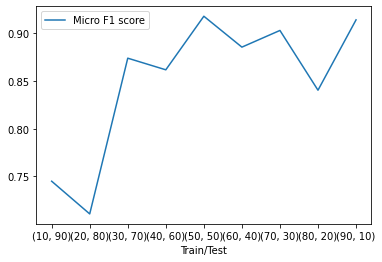

In [22]:
df.plot(x='Train/Test', y='Micro F1 score', kind = 'line')
plt.show()